## WEIGHTED RESIDUAL METHODS

### Collocation Method

We seek an approximate solution $u_{app}(x) = \sum_{j=1}^{n} a_i \phi_i(x)$ to a differential equation

$$ \mathcal{L}[u] = f \quad \text{in } \Omega, \qquad \mathcal{B}[u] = 0 \ \text{on } \partial\Omega $$.


The **residual** is

$$ R(x; \mathbf{a}) = \mathcal{L}[u_{app}](x) - f(x). $$

In the **collocation method**, the residual is forced to vanish at selected points (called *collocation points*) $\{x_i\}_{i=1}^{n}:
 R(x_i; \mathbf{a}) = 0, \qquad i = 1, 2, \dots, n.$

This gives a linear algebraic system

$$ \underbrace{\big[\mathcal{L}\phi_j(x_i)\big]_{i,j=1}^{n}}_{\mathbf{A}}
\,
\mathbf{a}
=
\underbrace{[\,f(x_i)\,]_{i=1}^{n}}_{\mathbf{r}},
\quad \Rightarrow \quad
\mathbf{a} = \mathbf{A}^{-1}\mathbf{r}.
$$

### Example

Apply collocation method on [0,1]:

$$ u'' + u = x, \qquad u(0)=0,\; u(1)=0. $$

In [1]:
import sympy
from sympy import symbols
from sympy.plotting import plot

In [39]:
x = symbols('x')
L = 1

In [41]:
a0, a1, a2 = symbols('a0 a1 a2')
phi0, phi1, phi2 = symbols('phi0 phi1 phi2')

In [43]:
phi0 = 1
phi1 = x
phi2 = x**2

In [45]:
u_app = a0*phi0 + a1*phi1 + a2*phi2

In [47]:
BC1 = u_app.subs(x,0)
BC2 = u_app.subs(x,1)

In [49]:
u_app

a0 + a1*x + a2*x**2

In [51]:
BC_sol = sympy.solve([BC1,BC2],[a0,a1])

In [53]:
BC_sol

{a0: 0, a1: -a2}

In [55]:
u_app = u_app.subs(a0,BC_sol[a0])
u_app = u_app.subs(a1,BC_sol[a1])

In [57]:
u_app

a2*x**2 - a2*x

In [59]:
LHS1 = sympy.diff(sympy.diff(u_app,x),x).subs(x,1/2)+u_app.subs(x,1/2)-1/2

In [61]:
eq_sol = sympy.solve([LHS1],[a2])

In [63]:
eq_sol

{a2: 0.285714285714286}

In [65]:
u_app = u_app.subs(a2,eq_sol[a2])

In [67]:
u_app

0.285714285714286*x**2 - 0.285714285714286*x

In [69]:
from sympy import symbols, Function, dsolve
import sympy
import matplotlib.pyplot as plt
x = symbols('x')
u_true = Function('u')(x)

In [71]:
up = u_true.diff(x)
upp = up.diff(x)
eqn = upp + u_true - x

In [73]:
u_true = dsolve(eqn, ics={u_true.subs(x,0):0, u_true.subs(x,L):0})

In [75]:
u_true

Eq(u(x), x - sin(x)/sin(1))

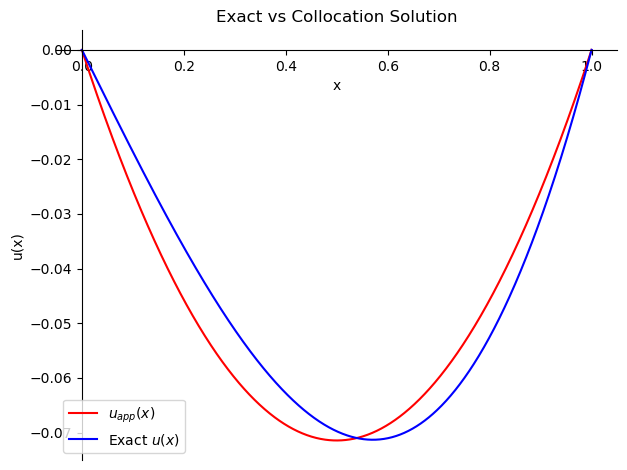

In [77]:
plt = plot( (u_app, (x, 0, L)), (u_true.rhs, (x, 0, L)), show=False)
#
plt[0].line_color = 'red'
plt[0].label = '$u_{app}(x)$'
plt[1].line_color = 'blue'
plt[1].label = 'Exact $u(x)$'
#
plt.legend = True
plt.title = 'Exact vs Collocation Solution'
plt.xlabel = 'x'
plt.ylabel = 'u(x)'
plt.show()